In [1]:
%matplotlib inline

This note is written based on these readings and view:
* https://www.real-statistics.com/distribution-fitting/kernel-density-estimation/#:~:text=A%20kernel%20is%20a%20probability,aka%20bandwidth)%20h%20%3E%200.
* https://en.wikipedia.org/wiki/Kernel_(statistics)#Kernel_functions_in_common_use
* https://www.youtube.com/watch?v=SUvPJ4URYGA


# Kernel Density Estimation

This is a technique that can be used to estimate the pdf of our data. It is a nonparametric technique since we do not use parameter such as the mean, standard deviation etc. but we simply just use the data points that we collected, put it inside a function (called kernel function) and we'll obtain the estimated pdf. The idea behind this technique is the histogram. For histogram, we can grouped our data into several bins before drawing it. And the bins can then be normalized so that the total area of our histogram will sum up to 1. Same goes with the KDE estimation, we'll create a smoothed curve for each datapoint and then will aggregate all curves into a single distribution.

The KDE that we'll get is

$$ f(x) = \frac{1}{nh} \sum_i{K(\frac{x-x_i}{h})} $$

where

h = bandwith, usually 0 < h < 1.

n = no. of data points,

K(u) = Kernel function

For this simulation, we'll try to create the KDE for our MysIDC "Illiteracy rate of population aged 15-24 years by sex 2001-2021" dataset. The kernel function that we will use is the gaussian kernel function since this is usually used by other researcher. The gaussian kernel function will be

$$ K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2} u^2}$$


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = 'C:/Users/farea/Desktop/Illiteracy rate of population aged 15-24 years by sex 2001 - 2021 Malaysia_dataset.xlsx'

data = pd.read_excel(path)
data = data.pivot(index='Year', columns = 'Sex', values = 'Illiteracy rate (%)')
data

Sex,Female,Male,Total
Year,,,
2001,1.700000,1.500000,1.600000
2002,1.800000,1.700000,1.800000
2003,1.700000,1.600000,1.700000
2004,1.800000,1.600000,1.700000
2005,1.700000,1.500000,1.600000
2006,1.600000,1.600000,1.600000
2007,1.500000,1.500000,1.500000
2008,1.600000,1.600000,1.600000
2009,1.600000,1.500000,1.500000


In [3]:
# we'll need to insert observed data points inside our kde method
class kde:
    def __init__(self, data_points, h=0.5):
        self.data = data_points
        self.n = len(data_points)
        self.h = h
        
    def kgauss(self,u):
        return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * (u**2))
    
    def f(self,x):
        return [self.kgauss((x - xi)/self.h) for xi in self.data]

    def pdf(self):
        j = np.linspace(np.min(self.data), np.max(self.data))
        dist = [self.f(x) for x in j]
        dist = pd.DataFrame(dist)
        dist = np.sum(dist, axis='columns')
        return j, (1/(self.n * self.h)) * dist

In [4]:
test = kde(data['Female'], h=0.255)
x, result = test.pdf()

(array([1.05820106, 1.32275132, 0.79365079, 0.26455026, 0.26455026,
        0.79365079, 0.52910053, 0.        , 0.26455026, 0.26455026]),
 array([1.5 , 1.68, 1.86, 2.04, 2.22, 2.4 , 2.58, 2.76, 2.94, 3.12, 3.3 ]),
 <BarContainer object of 10 artists>)

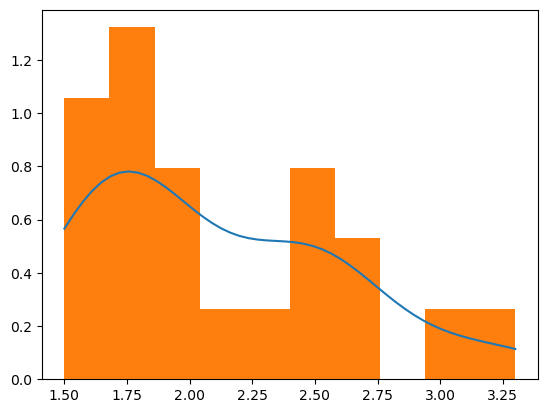

In [5]:
fig, ax = plt.subplots()
ax.plot(x,result, label = 'Gaussian KDE plot')
ax.hist(data['Female'], density=True, label = 'True histogram')

If we compare our plot with package that is more established..

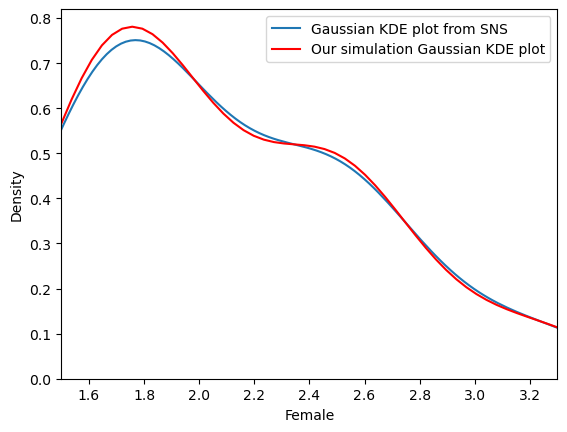

In [6]:
import seaborn as sns

fig, ax = plt.subplots()

sns.kdeplot(data['Female'],label = 'Gaussian KDE plot from SNS')
ax.plot(x,result, label = 'Our simulation Gaussian KDE plot', color='red')
ax.set_xlim(np.min(data['Female']), np.max(data['Female']))
plt.legend()

This smoothed curve is very helpful for us to get a general visual of how our data is distributed and somehow give us some insight on what kind of distribution that our data is coming from.